In [ ]:
# seems like the figures below can only be shown correctly in google colab but not in VS Code (at least not for MacOS)

# Statistical forecasting with SARIMA

## Load data

In [ ]:
path = './AirPassengers_log.parquet'

<Axes: >

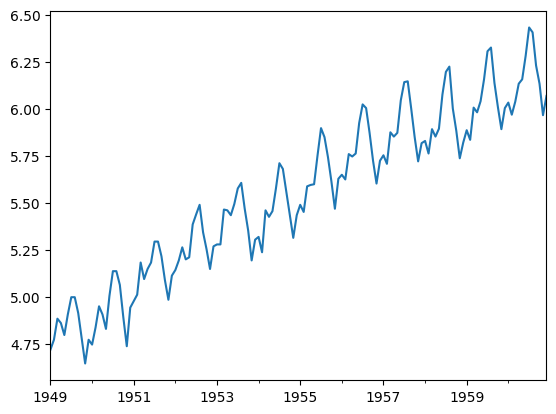

In [ ]:
import pandas as pd

df = pd.read_parquet(path).asfreq('ME')
df.columns = ["values"]
series = df["values"]
series.plot()

## Model fit

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#Carefully selecting P (autoregression order), D (number of differences for stationarity),
#and Q (moving average order) directly affects the ARIMA model's ability to represent patterns in historical data and produce accurate forecasts.
#ARIMA modeling assumes that the time series is stationary,
#differencing helps to achieve stationarity by stabilizing the mean and removing trends from the data.
model = ARIMA(endog=series, order=(12, 1, 1)) #model = ARIMA(series, order=(p, d, q))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 values   No. Observations:                  144
Model:                ARIMA(12, 1, 1)   Log Likelihood                 247.203
Date:                Thu, 27 Nov 2025   AIC                           -466.406
Time:                        23:24:19   BIC                           -424.926
Sample:                    01-31-1949   HQIC                          -449.550
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1024      0.058      1.770      0.077      -0.011       0.216
ar.L2         -0.0646      0.055     -1.184      0.237      -0.172       0.042
ar.L3          0.0019      0.049      0.038      0.970      -0.094       0.098
ar.L4         -0.0534      0.052     -1.031      0.303      -0.155       0.048
ar.L5          0.0405      0.052      0.777      0.437      -0.062       0.143
ar.L6         -0.0260      0.046     -0.566      0.572      -0.116       0.064
ar.L7         -0.0166      0.052     -0.316      0.752      -0.119       0.086
ar.L8         -0.0874      0.052     -1.681      0.093      -0.189       0.015
ar.L9          0.0614      0.057      1.070      0.285      -0.051       0.174
ar.L10        -0.0621      0.055     -1.126      0.260      -0.170       0.046
ar.L11         0.0575      0.050      1.153      0.249      -0.040       0.155
ar.L12         0.8236      0.049     16.727      0.000       0.727       0.920
ma.L1         -0.4219      0.090     -4.684      0.000      -0.598      -0.245
sigma2         0.0016      0.000      7.497      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.92
Prob(Q):                              0.72   Prob(JB):                         0.23
Heteroskedasticity (H):               0.50   Skew:                             0.34
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(endog=series, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             values   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Thu, 27 Nov 2025   AIC                           -483.393
Time:                                    23:24:23   BIC                           -474.767
Sample:                                01-31-1949   HQIC                          -479.888
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4017      0.073     -5.501      0.000      -0.545      -0.259
ma.S.L12      -0.5569      0.096     -5.783      0.000      -0.746      -0.368
sigma2         0.0013      0.000      9.120      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.84   Prob(JB):                         0.39
Heteroskedasticity (H):               0.58   Skew:                             0.02
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecast

In [ ]:
import pandas as pd
import plotly.io as pio
pio.templates.default = "plotly_dark"
pd.options.plotting.backend = "plotly"
pio.templates["plotly_dark"].layout.update(width=1000, height=500, showlegend=True, autosize=False)

Layout({
    'annotationdefaults': {'arrowcolor': '#f2f5fa', 'arrowhead': 0, 'arrowwidth': 1},
    'autosize': False,
    'autotypenumbers': 'strict',
    'coloraxis': {'colorbar': {'outlinewidth': 0, 'ticks': ''}},
    'colorscale': {'diverging': [[0, '#8e0152'], [0.1, '#c51b7d'], [0.2,
                                 '#de77ae'], [0.3, '#f1b6da'], [0.4, '#fde0ef'],
                                 [0.5, '#f7f7f7'], [0.6, '#e6f5d0'], [0.7,
                                 '#b8e186'], [0.8, '#7fbc41'], [0.9, '#4d9221'],
                                 [1, '#276419']],
                   'sequential': [[0.0, '#0d0887'], [0.1111111111111111,
                                  '#46039f'], [0.2222222222222222, '#7201a8'],
                                  [0.3333333333333333, '#9c179e'],
                                  [0.4444444444444444, '#bd3786'],
                                  [0.5555555555555556, '#d8576b'],
                                  [0.6666666666666666, '#ed7953'],
    

In [ ]:
def get_model_forecast(
    data_frame,
    column,
    order=(12, 1, 2),
    seasonal_order=None,
    horizon=48,
    column_name=None,
    forecast_exp=False,
    historical_predictions=True,
):
    df = data_frame.copy()
    series = df[column].dropna()

    if forecast_exp:
        series = np.log(series)

    p, d, q = order

    if seasonal_order is None:
        model = ARIMA(series, order=(p, d, q))
        model_name = f"ARIMA({p},{d},{q})"
    else:
        P, D, Q, m = seasonal_order
        model = SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, m))
        model_name = f"SARIMA({p},{d},{q})({P},{D},{Q},{m})"

    model_fit = model.fit()

    end = len(series) + horizon - 1
    if historical_predictions:
        forecast = model_fit.predict(start=series.index[0], end=end)
    else:
        forecast = model_fit.predict(start=len(series), end=end)

    if forecast_exp:
        forecast = np.exp(forecast)

    if column_name:
        model_name = column_name

    df_forecast = forecast.to_frame(name=model_name)
    df_combined = pd.concat([df, df_forecast], axis=1)
    #Transforming both series into data frames and concatenating them provides a unified structure,
    #allowing for seamless plotting and comparison of the observed and forecasted data side by side.
    return df_combined

In [ ]:
df_forecast = get_model_forecast(df, 'values', order=(12, 1, 1), horizon=96)
#Fitting an AR at lag 12 in ARIMA treats the 12th lag as just another delay, not capturing seasonality.
#SARIMA's seasonal order accounts for pattern repetition (such as every year),
#making seasonal AR terms more appropriate when p-values for ordinary AR lags are not significant.

df_forecast = get_model_forecast(df_forecast, 'values', order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), horizon=96)

df_forecast.plot(color="variable")

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Diagnostics and assumptions

In [ ]:
#Even if the forecast looks correct visually, only checking diagnostics can confirm that the assumptions required for ARIMA
#(like uncorrelated, normally distributed, and homoscedastic residuals) hold.
#If these are violated, your forecast could be biased or unreliable.

In [ ]:
model = SARIMAX(series, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit()

In [ ]:
residuals = model_fit.resid[12+1:]
residuals

,0
1950-02-28,0.039164
1950-03-31,0.013907
1950-04-30,-0.015032
1950-05-31,-0.018956
1950-06-30,0.058538
...,...
1960-08-31,-0.032249
1960-09-30,-0.009701
1960-10-31,0.029512
1960-11-30,-0.027164


### Autocorrelation

In [ ]:
# Examining the ACF and PACF guides you in selecting the right values for P (autoregressive) and Q (moving average) components,
# as specific patterns in these plots point to how many past observations are relevant.
# This leads to a model that reflects the true dependencies in the historical data.

#### Plot

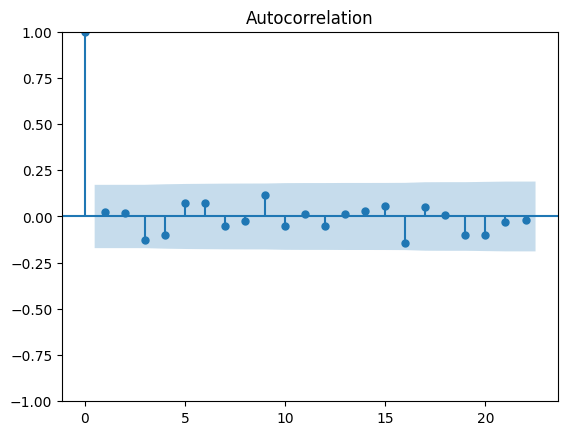

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals);

#### Test

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuals, lags=[10, 20, 30]).style

,lb_stat,lb_pvalue
10,8.040576,0.624873
20,15.690971,0.735601
30,26.226209,0.663537


### Normality

#### Plot

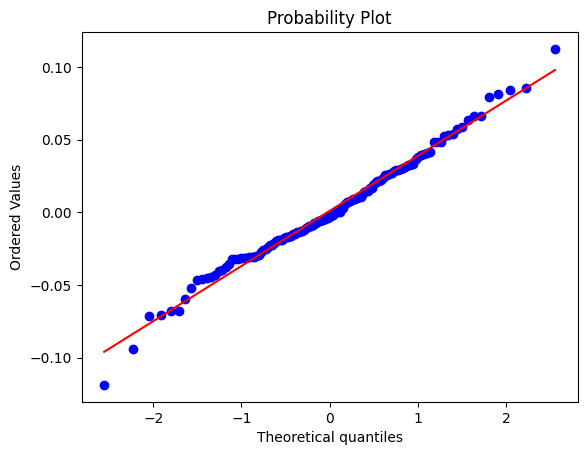

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots()
stats.probplot(residuals, dist='norm', plot=ax);

#### Test

In [ ]:
from scipy.stats import jarque_bera
jarque_bera(residuals)

SignificanceResult(statistic=np.float64(1.7634602138073074), pvalue=np.float64(0.41406591332331566))

### Homoscedasticity

In [ ]:
#Imagine you are using an ARIMA model to forecast monthly sales and notice that the residuals fail the homoscedasticity test (p-value 0.05).
#What is the most appropriate action to take?

#A failed homoscedasticity test may indicate that seasonal effects aren't properly captured;
#SARIMA incorporates seasonality and may resolve the issue.
#A p-value below 0.05 in the homoscedasticity test indicates non-constant variance in residuals,
#which may mean the ARIMA model isn't capturing seasonal patterns or other important features.


#### Plot

In [ ]:
residuals.plot()

#### Test

In [ ]:
from statsmodels.stats.diagnostic import het_arch
het_arch(residuals)

(np.float64(13.666865388162359),
 np.float64(0.18873629093570043),
 1.400644077091974,
 0.18935371962019082)